In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Задание 1
## Цель задачи - бинарная классификация данных (сгенерированные с помощь AI или нет)

1. Загрузка данных

In [ ]:
!gdown 1lGIpg3OhOAlNPgBDTAv5AYgpIdEz2Isa # data
!gdown 1_R7mVJMgVxdlC5-TjdLnxB8HTX9unZ-_ # task

Downloading...
From (original): https://drive.google.com/uc?id=1lGIpg3OhOAlNPgBDTAv5AYgpIdEz2Isa
From (redirected): https://drive.google.com/uc?id=1lGIpg3OhOAlNPgBDTAv5AYgpIdEz2Isa&confirm=t&uuid=1b89989d-aaff-482d-b6f1-0e310c9ff94e
To: /content/14962653.zip
100% 40.5M/40.5M [00:00<00:00, 88.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1_R7mVJMgVxdlC5-TjdLnxB8HTX9unZ-_
From (redirected): https://drive.google.com/uc?id=1_R7mVJMgVxdlC5-TjdLnxB8HTX9unZ-_&confirm=t&uuid=ef466929-be78-45ea-bd6a-f70d28c01aa6
To: /content/pan25-generative-ai-detection-task1-train.zip
100% 40.5M/40.5M [00:00<00:00, 127MB/s]


In [ ]:
!unzip 14962653.zip

Archive:  14962653.zip
replace pan25-generative-ai-detection-task1-train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  pan25-generative-ai-detection-task1-train.zip
  inflating: train.jsonl             
  inflating: val.jsonl               


In [ ]:
!unzip pan25-generative-ai-detection-task1-train.zip

Archive:  pan25-generative-ai-detection-task1-train.zip
replace train.jsonl? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace val.jsonl? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
train_df = pd.read_json("train.jsonl", lines=True)
val_df = pd.read_json("val.jsonl", lines=True)

In [ ]:
print(f"Размер валидации: {val_df.shape[0]}")
val_df.head()

Размер валидации: 3589


,id,text,model,label,genre
0,7caf42b9-fd48-5e97-a0d0-0ae28a1f9603,"In William Faulkner's ""The Sound and the Fury,...",gpt-4o,1,essays
1,28b61fc4-e82b-5cf8-bc34-1ecdb7182993,"Manipulation, a profound and pervasive theme i...",gpt-4.5-preview,1,essays
2,22398c76-da72-5724-973e-0981b8e9cbee,Edna's journey is a testament to her rebellion...,llama-3.3-70b-instruct,1,essays
3,3cd1e50d-e1f0-5f8f-bfb8-0b8a6048bcaa,There are three main aspects of the gun contro...,human,0,essays
4,6e5745a6-0335-50cc-bdf0-fa0e1fee7518,During the Portuguese colonial period in Angol...,gpt-4o,1,essays


In [ ]:
print(f"Размер трейна: {train_df.shape[0]}")
train_df.head()

Размер трейна: 23707


,id,text,model,label,genre
0,ea468d03-1973-5039-86b2-ff225bb92c4e,"Duke Ellington, a titan of jazz, revolutionize...",falcon3-10b-instruct,1,essays
1,0d05f269-6d67-521d-9b5d-cc18f482c6c1,I reflected on the shifting dynamics of media ...,o3-mini,1,essays
2,c2ec79f3-da80-58f8-bef0-3e0ea7ab072f,"In F. Scott Fitzgerald's ""The Great Gatsby,"" t...",gpt-4o,1,essays
3,4ad37c58-0bb7-536b-997d-cfccabd0d094,I still chuckle when I think about that time I...,deepseek-r1-distill-qwen-32b,1,essays
4,07747b0c-5051-5e0d-8096-b4d4ed8bd98e,"Yoga, originating in ancient India, encompasse...",gemini-2.0-flash,1,essays


In [ ]:
val_df["split"] = "val"
train_df["split"] = "train"
df = pd.concat([train_df, val_df])

In [ ]:
df.head()

,id,text,model,label,genre,split
0,ea468d03-1973-5039-86b2-ff225bb92c4e,"Duke Ellington, a titan of jazz, revolutionize...",falcon3-10b-instruct,1,essays,train
1,0d05f269-6d67-521d-9b5d-cc18f482c6c1,I reflected on the shifting dynamics of media ...,o3-mini,1,essays,train
2,c2ec79f3-da80-58f8-bef0-3e0ea7ab072f,"In F. Scott Fitzgerald's ""The Great Gatsby,"" t...",gpt-4o,1,essays,train
3,4ad37c58-0bb7-536b-997d-cfccabd0d094,I still chuckle when I think about that time I...,deepseek-r1-distill-qwen-32b,1,essays,train
4,07747b0c-5051-5e0d-8096-b4d4ed8bd98e,"Yoga, originating in ancient India, encompasse...",gemini-2.0-flash,1,essays,train


In [ ]:
df.isna().sum() # Данные без пропусков

,0
id,0
text,0
model,0
label,0
genre,0
split,0


посмотрим на распределение по моделям, датасетам и таргетам

In [ ]:
df["text_len"] = df["text"].str.len()

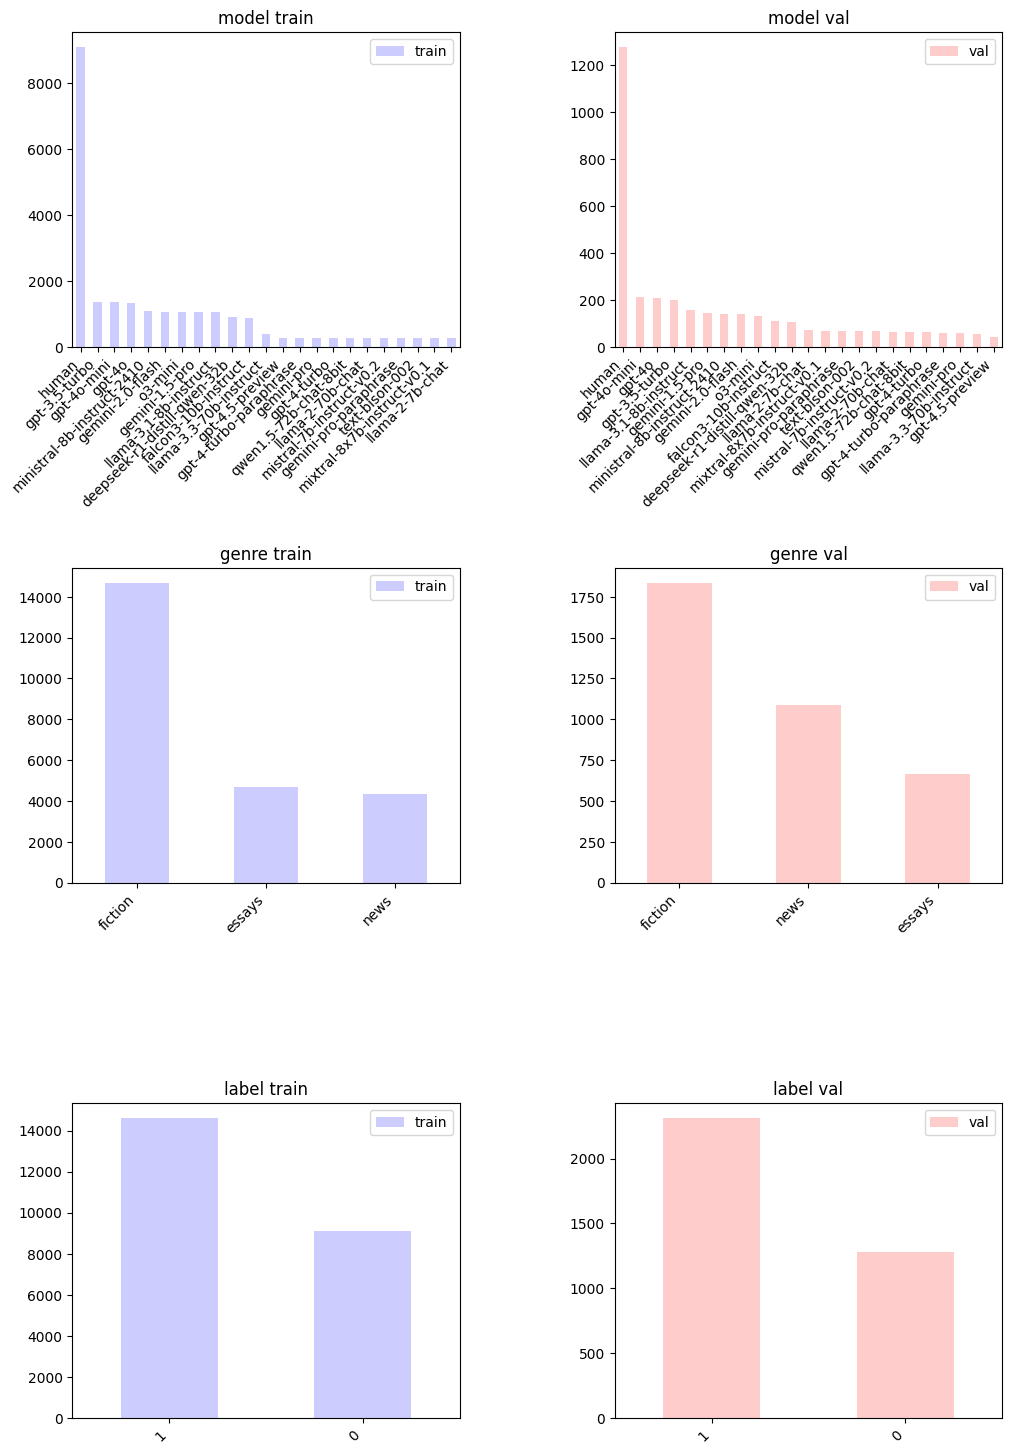

In [ ]:
columns_to_plot = ['model', 'genre', 'label']
colors = {
    0: "blue",
    1: "red"
}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 6*len(columns_to_plot)))
fig.subplots_adjust(
    wspace=0.4,
    hspace=0.7
)

axes_flat = axes.flatten()
for i, column in enumerate(columns_to_plot):
    for i_add, split in enumerate(["train", "val"]):
      ax = axes_flat[i*2+i_add]
      # norm_val = df.loc[df["split"] == split, column].value_counts().sum()
      norm_val = 1
      ax_inner = (df.loc[df["split"] == split, column].value_counts()/norm_val).plot.bar(
          title = column + " " + split,
          ax=ax, color=colors[i_add],
          alpha=0.2,
          xlabel=""
      )
      ax_inner.set_xticklabels(ax_inner.get_xticklabels(), rotation=45, ha='right')
      ax.legend([split])

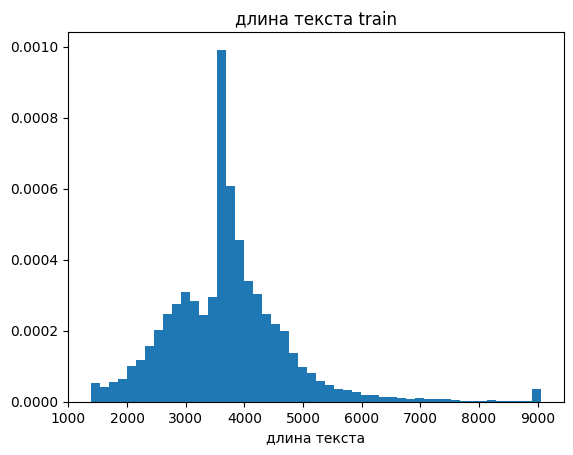

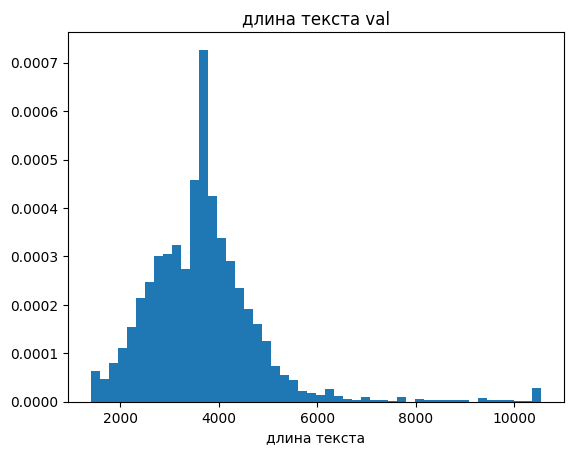

In [ ]:
for split in ["train", "val"]:

  data = df.loc[df["split"] == split, "text_len"].copy()
  data = data.clip(lower=data.quantile(0.005), upper=data.quantile(0.995))
  ax = plt.hist(data, density=True, bins = 50)
  plt.xlabel("длина текста")
  plt.title(f"длина текста {split}")
  plt.show()

In [ ]:
df.loc[df["split"] == split, "text_len"].quantile(0.98)

np.float64(6807.479999999989)

**Выводы из визуализации данных:**
* Не очень понятен принцип разделения на train/val;
* Есть небольшой дисбаланс классов, если будут "микро" метрики, то важно учесть;
* Распределение по типам источников данных в train/val +- совпадает. В test может отличаться;
* Оснвная масса текстов длиной до 7к символов ~= 2.5к токенов;



# Задание 2
## Цель задачи - многоклассовая классификация данных (подкатегории сгенерированных и частично сгенерированных данных + полностью написанные человеком)
## Список классов:
* Fully human-written: The document is entirely authored by a human without any AI assistance.
* Human-initiated, then machine-continued: A human starts writing, and an AI model completes the text.
* Human-written, then machine-polished: The text is initially written by a human but later refined or edited by an AI model.
* Machine-written, then machine-humanized (obfuscated): An AI generates the text, which is later modified to obscure its machine origin.
* Machine-written, then human-edited: The content is generated by an AI but subsequently edited or refined by a human.
* Deeply-mixed text: The document contains interwoven sections written by both humans and AI, without a clear separation.

1. Загрузка данных

In [ ]:
!gdown 1rNQTkhkVG9nzcT97Nk_WyJd80ZaacT0- # dev file
!gdown 1u5C4o_fmjL5nQ_RtgLDShuG97Ix6_KGK # train file

Downloading...
From (original): https://drive.google.com/uc?id=1rNQTkhkVG9nzcT97Nk_WyJd80ZaacT0-
From (redirected): https://drive.google.com/uc?id=1rNQTkhkVG9nzcT97Nk_WyJd80ZaacT0-&confirm=t&uuid=039e9b94-03aa-4f04-b5b6-208c3d5a026b
To: /content/subtask2_dev.jsonl
100% 140M/140M [00:01<00:00, 75.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1u5C4o_fmjL5nQ_RtgLDShuG97Ix6_KGK
From (redirected): https://drive.google.com/uc?id=1u5C4o_fmjL5nQ_RtgLDShuG97Ix6_KGK&confirm=t&uuid=552cd2c3-ede7-49b1-93d4-76bc9b645895
To: /content/subtask2_train.jsonl
100% 662M/662M [00:08<00:00, 74.6MB/s]


In [ ]:
val_df = pd.read_json("subtask2_dev.jsonl", lines=True)
train_df = pd.read_json("subtask2_train.jsonl", lines=True)

In [ ]:
print(f"Размер валидации: {val_df.shape[0]}")
val_df.head()

Размер валидации: 288918


,text,language,label,source_dataset,model,label_text
0,Have you ever had to wait for something for a ...,English,4,TriBERT,chatgpt,deeply-mixed text; where some parts are writte...
1,"But now, things were not so simple._SEP_The gi...",English,3,RoFT_chatgpt,llm1-llm2,"human-initiated, then machine-continued"
2,"Dear Editor, I am writing to express my opini...",English,4,TriBERT,chatgpt,deeply-mixed text; where some parts are writte...
3,Humans once wielded formidable magical power. ...,English,4,Coauthor,gpt-3,deeply-mixed text; where some parts are writte...
4,"Here is a way that I had to be patient, and we...",English,4,TriBERT,chatgpt,deeply-mixed text; where some parts are writte...


In [ ]:
print(f"Размер трейна: {train_df.shape[0]}")
train_df.head()

Размер трейна: 72661


,text,language,label,source_dataset,model,label_text
0,In a brief speech with a main theme of comprom...,English,0,RoFT,human,fully human-written
1,HOW TO MAKE: Fall Squash Vegetarian Brioche\nI...,English,0,RoFT,human,fully human-written
2,The paper models the relation extraction probl...,English,3,m4gt-bench,llama2,"human-initiated, then machine-continued"
3,This paper considers the problem of model-base...,English,3,m4gt-bench,llama2,"human-initiated, then machine-continued"
4,Paper Summary:\n\nAuthors investigate identity...,English,3,m4gt-bench,llama2,"human-initiated, then machine-continued"


In [ ]:
val_df["split"] = "val"
train_df["split"] = "train"
df = pd.concat([train_df, val_df])

In [ ]:
df.head()

,text,language,label,source_dataset,model,label_text,split
0,In a brief speech with a main theme of comprom...,English,0,RoFT,human,fully human-written,train
1,HOW TO MAKE: Fall Squash Vegetarian Brioche\nI...,English,0,RoFT,human,fully human-written,train
2,The paper models the relation extraction probl...,English,3,m4gt-bench,llama2,"human-initiated, then machine-continued",train
3,This paper considers the problem of model-base...,English,3,m4gt-bench,llama2,"human-initiated, then machine-continued",train
4,Paper Summary:\n\nAuthors investigate identity...,English,3,m4gt-bench,llama2,"human-initiated, then machine-continued",train


In [ ]:
df.isna().sum() # Данные без пропусков

,0
text,0
language,0
label,0
source_dataset,0
model,0
label_text,0
split,0
text_len,0


посмотрим на распределение по моделям, датасетам и таргетам

In [ ]:
df["text_len"] = df["text"].str.len()

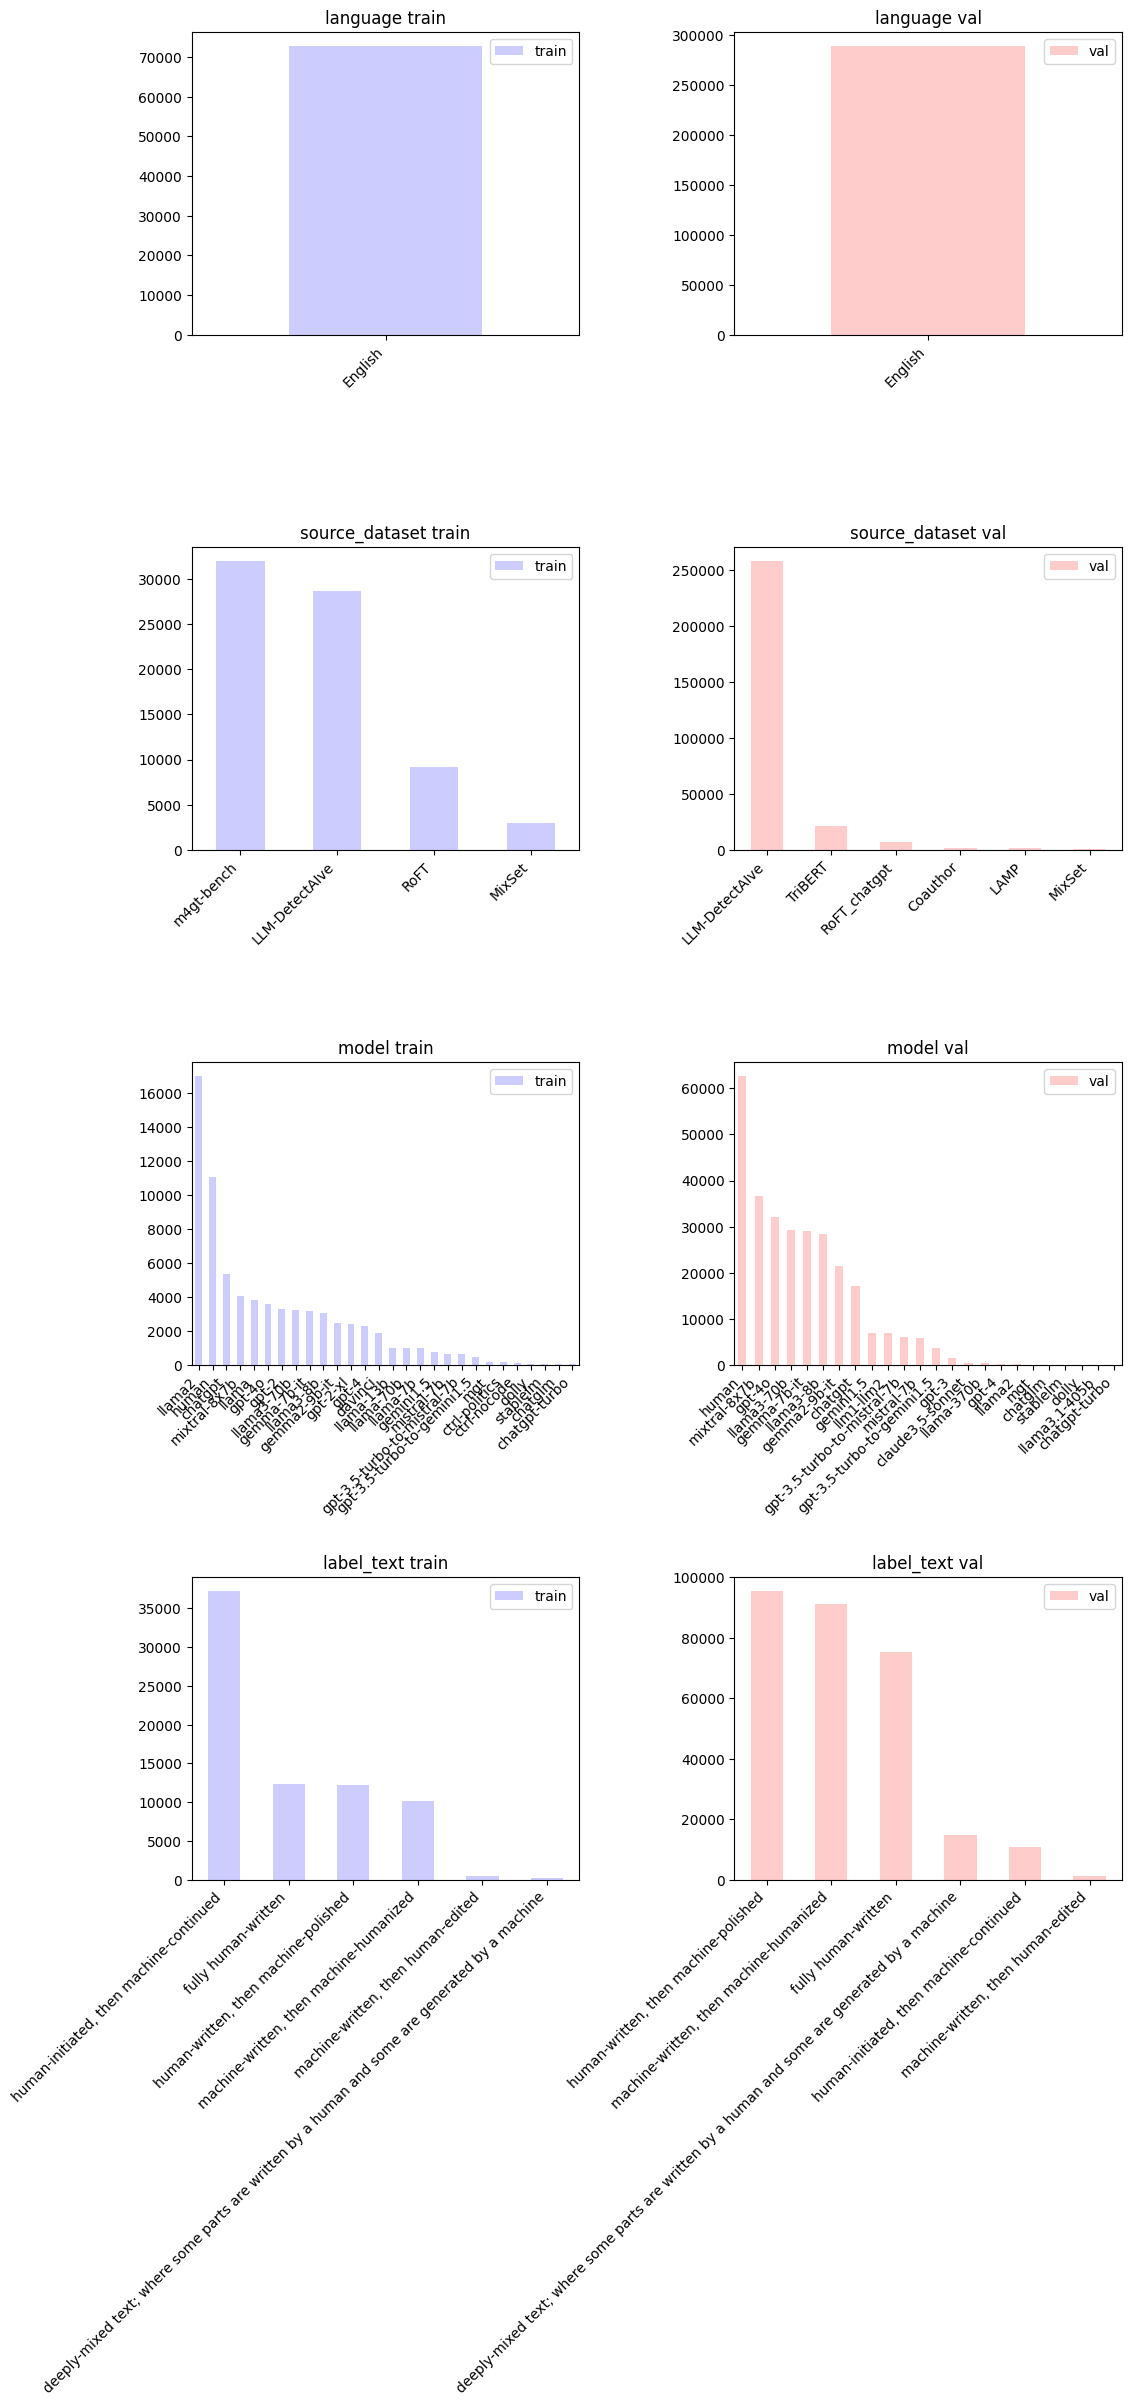

In [ ]:
columns_to_plot = ['language', 'source_dataset', 'model', 'label_text']
colors = {
    0: "blue",
    1: "red"
}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 6*len(columns_to_plot)))
fig.subplots_adjust(
    wspace=0.4,
    hspace=0.7
)

axes_flat = axes.flatten()
for i, column in enumerate(columns_to_plot):
    for i_add, split in enumerate(["train", "val"]):
      ax = axes_flat[i*2+i_add]
      # norm_val = df.loc[df["split"] == split, column].value_counts().sum()
      norm_val = 1
      ax_inner = (df.loc[df["split"] == split, column].value_counts()/norm_val).plot.bar(
          title = column + " " + split,
          ax=ax, color=colors[i_add],
          alpha=0.2,
          xlabel=""
      )
      ax_inner.set_xticklabels(ax_inner.get_xticklabels(), rotation=45, ha='right')
      ax.legend([split])

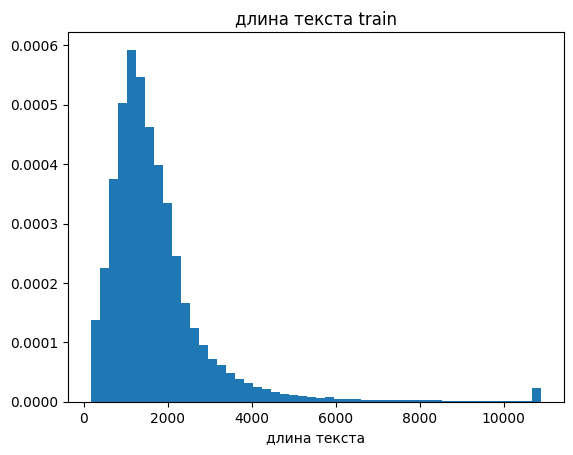

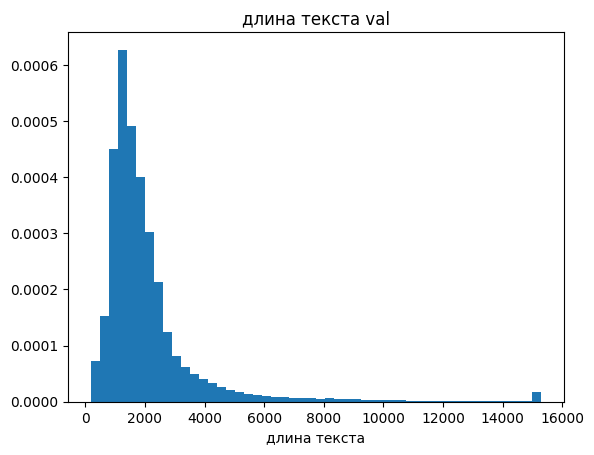

In [ ]:
for split in ["train", "val"]:

  data = df.loc[df["split"] == split, "text_len"].copy()
  data = data.clip(lower=data.quantile(0.005), upper=data.quantile(0.995))
  ax = plt.hist(data, density=True, bins = 50)
  plt.xlabel("длина текста")
  plt.title(f"длина текста {split}")
  plt.show()

In [ ]:
df.loc[df["split"] == split, "text_len"].quantile(0.98)

np.float64(8186.0)

**Выводы из визуализации данных:**
* Не очень понятен принцип разделения на train/val;
* Данные только на английском (хотя в задании указана мультиязычность);
* Есть сильный дисбаланс классов, если будут "микро" метрики, то важно учесть;
* Распределение по датасетам данных в train/val сильно отличается. В test скорее всего будет вообще другой набор исходных датасетов, тк они в открыом доступе (но можно проверить на такого рода лики :) );
* Сложно восстанвливать баланс, скорее всего наиболее подходящие для обучения будут metric-learning подходы;
* Оснвная масса текстов длиной до 8к символов ~= 3к токенов;
* Ссылки на статьи по используемым данным:
  - [LLM-DetectAlive](https://arxiv.org/abs/2408.04284);
  - [m4gt-bench](https://arxiv.org/abs/2402.11175) тут прям есть [данные](https://drive.google.com/drive/folders/1hBgW6sgZfz1BK0lVdUu0bZ4HPKSpOMSY);
  - [RoFT](https://arxiv.org/abs/2010.03070)
  - [MixSet](MixSet);
  - [TriBERT](https://arxiv.org/abs/2110.13412);
  - [RoFT_chatgpt](https://paperswithcode.com/dataset/roft-chatgpt) тут, кстати, гигачек тестили;
  - [Coauthor](https://arxiv.org/abs/2201.06796);
  - [LAMP](https://arxiv.org/abs/2304.11406);
* Ссылки на допонительные датасеты по тематике:
  - [датасеты с hf по детекции генеративного текста](https://huggingface.co/datasets?task_categories=task_categories:text-classification&sort=trending&search=generat) тут в основном отзывы;

